In [12]:
import os

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [ ]:
RUN_ID = "run_now"

In [7]:
PROJ_ROOT = "/home/fichtner/projects/footprintQTL"
os.chdir(PROJ_ROOT)

HCA_BORGS_PROJ = "data/datasets/hca_brain-organoids/"

In [10]:
eqtls = pd.read_csv(os.path.join(HCA_BORGS_PROJ, "eQTL_mapping/eSNPs_significant_all_celltypes_HVGs.tsv"), sep='\t', header=0)
eqtls.astype({'snp_chromosome': 'int'}, {'snp_position': 'int'})

print(eqtls.columns.tolist())
eqtls

['snp_id', 'p_value', 'beta', 'beta_se', 'empirical_feature_p_value', 'feature_chromosome', 'feature_start', 'feature_end', 'gene_name', 'n_samples', 'n_e_samples', 'alpha_param', 'beta_param', 'rho', 'snp_chromosome', 'snp_position', 'assessed_allele', 'call_rate', 'maf', 'hwe_p', 'feature_id', 'QTL', 'global_corrected_pValue', 'global_corrected_pValue_BH', 'global_corrected_pValue_BF', 'celltype']


,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,gene_name,n_samples,...,assessed_allele,call_rate,maf,hwe_p,feature_id,QTL,global_corrected_pValue,global_corrected_pValue_BH,global_corrected_pValue_BF,celltype
0,chr13_112983450_T_C,0.000066,-0.364427,0.092665,0.000000e+00,13,113009671,113010319,NaN,277,...,C,1.0,0.044776,1.000000,ENSG00000269376,ENSG00000269376-chr13_112983450_T_C,0.000000e+00,0.000000e+00,0.000000e+00,immature_EN
1,chr13_27824764_C_T,0.047441,-0.089739,0.045430,0.000000e+00,13,27977717,27988693,URAD,277,...,C,1.0,0.089552,0.073438,ENSG00000183463,ENSG00000183463-chr13_27824764_C_T,0.000000e+00,0.000000e+00,0.000000e+00,immature_EN
2,chr15_101221494_A_C,0.202509,-0.088910,0.069866,0.000000e+00,15,101168530,101170821,NaN,277,...,A,1.0,0.044776,0.110206,ENSG00000259182,ENSG00000259182-chr15_101221494_A_C,0.000000e+00,0.000000e+00,0.000000e+00,immature_EN
3,chr12_127567286_A_G,0.265404,-0.030918,0.027792,0.000000e+00,12,127486938,127533242,NaN,277,...,G,1.0,0.074627,1.000000,ENSG00000286922,ENSG00000286922-chr12_127567286_A_G,0.000000e+00,0.000000e+00,0.000000e+00,immature_EN
4,chr12_129375924_C_G,0.949835,-0.000101,0.001608,4.101945e-163,12,129622929,129625366,NaN,277,...,C,1.0,0.089552,0.073438,ENSG00000286246,ENSG00000286246-chr12_129375924_C_G,1.930191e-161,2.223254e-161,1.111627e-160,immature_EN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,chr5_145190494_A_T,0.000033,0.535958,0.130797,1.828702e-02,5,145337932,145381670,NaN,310,...,A,1.0,0.316176,1.000000,ENSG00000250842,ENSG00000250842-chr5_145190494_A_T,4.610052e-02,4.610052e-02,1.000000e+00,Differentiating_RG
2466,chr19_28873752_G_A,0.000285,-0.620958,0.172965,1.854836e-02,19,28602379,28648303,NaN,310,...,G,1.0,0.066176,0.246147,ENSG00000267537,ENSG00000267537-chr19_28873752_G_A,4.669823e-02,4.669823e-02,1.000000e+00,Differentiating_RG
2467,chr6_168100952_C_G,0.001926,-0.216988,0.070509,1.932144e-02,6,168217032,168220262,NaN,310,...,C,1.0,0.102941,1.000000,ENSG00000287056,ENSG00000287056-chr6_168100952_C_G,4.858106e-02,4.858106e-02,1.000000e+00,Differentiating_RG
2468,chr2_112830976_A_G,0.017801,-0.395662,0.167722,1.944629e-02,2,112721020,112742879,NT5DC4,310,...,G,1.0,0.073529,1.000000,ENSG00000144130,ENSG00000144130-chr2_112830976_A_G,4.883123e-02,4.883123e-02,1.000000e+00,Differentiating_RG


In [ ]:
eqtls['snp_chromosome'].cat.categories

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int64')

In [32]:
# Feature mutation
eqtls['minuslog10pvalue'] = -np.log10(eqtls['p_value'])

eqtls.snp_chromosome = eqtls.snp_chromosome.astype('category')
eqtls.snp_chromosome = eqtls.snp_chromosome.cat.set_categories([i for i in range(24)], ordered=True)
eqtls = eqtls.sort_values(['snp_chromosome', 'snp_position'])

# How to plot gene vs. -log10(p_value) and colour it by chromosome?
eqtls['ind'] = range(len(eqtls))

eqtls

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,gene_name,n_samples,...,maf,hwe_p,feature_id,QTL,global_corrected_pValue,global_corrected_pValue_BH,global_corrected_pValue_BF,celltype,minuslog10pvalue,ind
921,chr1_1050080_T_C,0.718516,-0.002860,0.007935,7.100464e-07,1,1211326,1214153,TNFRSF4,295,...,0.057143,1.000000,ENSG00000186827,ENSG00000186827-chr1_1050080_T_C,4.802786e-06,4.802786e-06,4.274480e-04,Midbrain_EN,0.143563,0
818,chr1_1169858_T_C,0.000149,0.436706,0.116772,1.737628e-03,1,960584,965719,KLHL17,255,...,0.363636,1.000000,ENSG00000187961,ENSG00000187961-chr1_1169858_T_C,1.163753e-02,1.163753e-02,8.844524e-01,UL-EN,3.826708,1
1967,chr1_1254681_A_G,0.010601,-0.251069,0.098761,1.378416e-155,1,1430539,1434573,LINC01770,310,...,0.058824,1.000000,ENSG00000225285,ENSG00000225285-chr1_1254681_A_G,9.980557e-155,9.980557e-155,2.654828e-152,Differentiating_RG,1.974650,2
897,chr1_2283682_C_T,0.926283,-0.000118,0.001273,6.941192e-13,1,2326201,2326693,NaN,295,...,0.107143,0.162313,ENSG00000272161,ENSG00000272161-chr1_2283682_C_T,6.428611e-12,6.428611e-12,4.178597e-10,Midbrain_EN,0.033256,3
1906,chr1_2370252_G_A,0.887957,-0.000220,0.001561,3.634279e-214,1,2492300,2493258,NaN,310,...,0.191176,0.695287,ENSG00000224387,ENSG00000224387-chr1_2370252_G_A,3.414449e-213,3.414449e-213,6.999621e-211,Differentiating_RG,0.051608,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,chr22_50280822_A_G,0.000692,-0.368230,0.109434,1.312903e-02,22,50089879,50161690,MOV10L1,350,...,0.340278,1.000000,ENSG00000073146,ENSG00000073146-chr22_50280822_A_G,4.878813e-02,4.878813e-02,1.000000e+00,Stressed_Prog,3.159614,2465
399,chr22_50370391_A_G,0.467343,-0.011306,0.015562,0.000000e+00,22,50316035,50317025,NaN,355,...,0.055556,1.000000,ENSG00000279182,ENSG00000279182-chr22_50370391_A_G,0.000000e+00,0.000000e+00,0.000000e+00,Glia,0.330365,2466
1046,chr22_50541744_TTTTG_T,0.025795,-0.086329,0.038849,4.451624e-185,22,50735825,50738139,NaN,387,...,0.069444,1.000000,ENSG00000225929,ENSG00000225929-chr22_50541744_TTTTG_T,5.551437e-184,5.551437e-184,1.887489e-182,Dividing_Glia,1.588457,2467
405,chr22_50707274_C_G,0.712834,-0.002828,0.007685,0.000000e+00,22,50735825,50738139,NaN,355,...,0.055556,1.000000,ENSG00000225929,ENSG00000225929-chr22_50707274_C_G,0.000000e+00,0.000000e+00,0.000000e+00,Glia,0.147012,2468


In [38]:
# Define chromosome sizes (based on GRCh38/hg38)
chromosome_sizes = {
    '0': 248956422, '1': 242193529, '2': 198295559, '3': 190214555, '4': 181538259,
    '5': 170805979, '6': 159345973, '7': 145138636, '8': 138394717, '9': 133797422,
    '10': 135086622, '11': 133275309, '12': 114364328, '13': 107043718, '14': 101991189,
    '15': 90338345, '16': 83257441, '17': 80373285, '18': 58617616, '19': 64444167,
    '20': 46709983, '21': 50818468, '22': 156040895, '23': 57227415
}

# Calculate cumulative positions for each SNP
chromosome_offsets = {}
cumulative_size = 0
for chrom in eqtls['snp_chromosome'].cat.categories:
    chromosome_offsets[chrom] = cumulative_size
    cumulative_size += chromosome_sizes[str(chrom)]

# Apply cumulative positions
eqtls['cumulative_pos'] = eqtls.apply(lambda x: x['snp_position'] + chromosome_offsets[x['snp_chromosome']], axis=1)

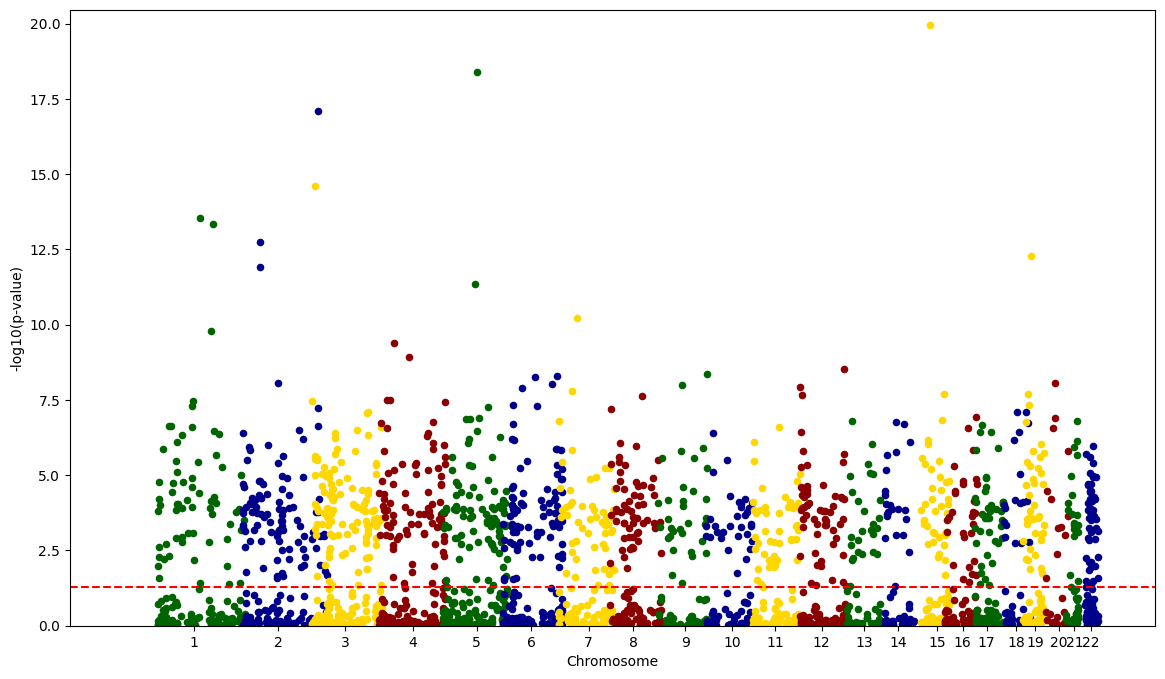

In [41]:
# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(eqtls.groupby('snp_chromosome')):
    group.plot(kind='scatter', x='cumulative_pos', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    # ax.scatter(group['ind'], group['minuslog10pvalue'], color=colors[num % len(colors)], label=name, s=10)
    x_labels.append(name)
    # x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
    x_labels_pos.append(group['cumulative_pos'].mean())

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, cumulative_size])
ax.set_ylim([0, eqtls['minuslog10pvalue'].max() + 0.5])

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('-log10(p-value)')

plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')

# show the graph
plt.show()